In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
#Cargamos los datos con los que hemos estado trabajando

datos = np.load('fit_exercise.npy')

In [4]:
#Definimos las funciones necesarias para el algoritmo

def recta(x, a, b):
    return a*x + b

def likelihood(valores, a, b):
    x = valores[0]
    y = valores[1]
    err = valores[2]
    modelo = recta(x, a, b)
    lh = - 0.5*np.sum(((y - modelo)**2)/((err)**2))
    return lh

def prior_a(a):
    c = -10
    d = 10
    W = d - c
    if a >= c and a <= d:
        p_a = 1/W
    else:
        p_a = 0
    return p_a

def prior_b(b):
    c = -10
    d = 10
    W = d - c
    if b >= c and b <= d:
        p_b = 1/W
    else:
        p_b = 0
    return p_b

In [25]:
a_lista = []
b_lista = []

for i in range(5):
    a = np.random.uniform(-8, 8)
    b = np.random.uniform(-8, 8)
    a_aux = [a]
    b_aux = [b]
    posterior = likelihood(datos, a, b) + np.log(prior_a(a)) + np.log(prior_b(b))
    for j in range(20000):
        a_new = np.random.normal(a, 0.1)
        b_new = np.random.normal(b, 0.1)
        posterior_new = likelihood(datos, a_new, b_new) + np.log(prior_a(a_new)) + np.log(prior_b(b_new))
        if posterior_new > posterior:
            a_aux.append(a_new)
            b_aux.append(b_new)
            a = a_new
            b = b_new
            posterior = posterior_new
        else:
            random = np.random.random()
            if posterior_new - posterior > random:
                a_aux.append(a_new)
                b_aux.append(b_new)
                a = a_new
                b = b_new
                posterior = posterior_new
            else:
                a_aux.append(a_new)
                b_aux.append(b_new)
    a_lista.append(a_aux)
    b_lista.append(b_aux)

Text(0, 0.5, 'b')

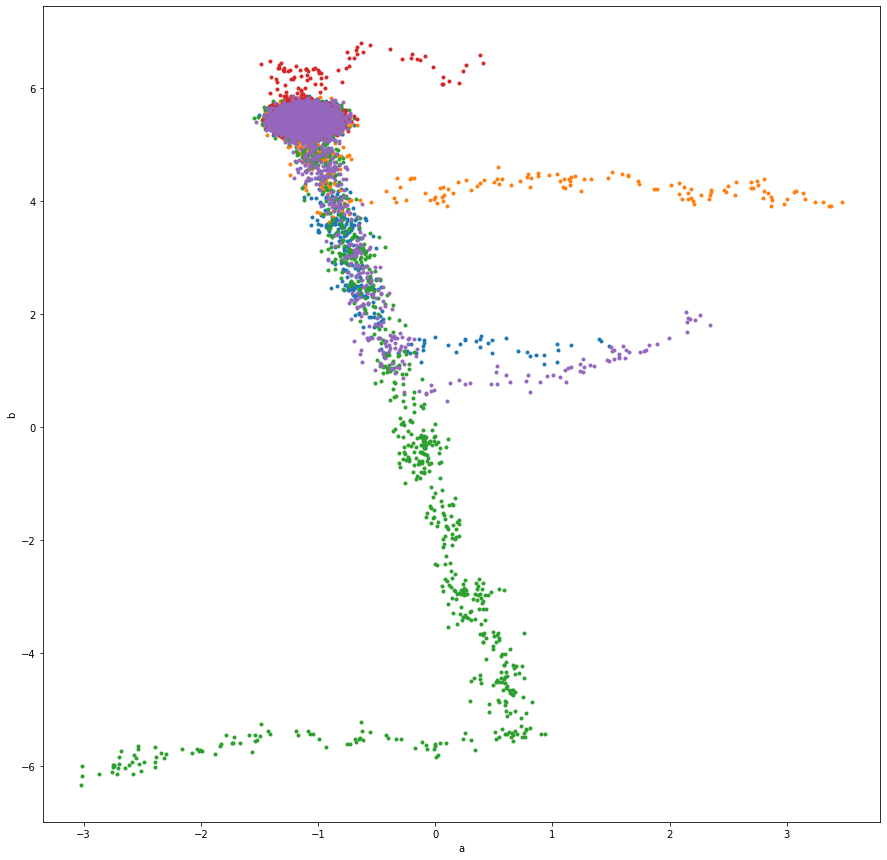

In [26]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.plot(a_lista[i], b_lista[i], '.');
plt.xlabel('a')
plt.ylabel('b')

# Diagnóstico de Gelman-Rubin

Para calcular $\hat{R}$, es necesario calcular $s^{2}$ y $\hat{\sigma}^{2}$, para ello tenemos las siguientes relaciones

$s_{i}^{2} = \frac{1}{n - 1} \sum_{t = 1}^{n} (X_{it} - \bar{X}_{i})^{2}$

$s^{2} = \frac{1}{m} \sum_{i = 1}^{m} s_{i}^{2}$

$\frac{B}{n} = \frac{1}{m - 1} \sum_{i = 1}^{m} (\bar{X}_{i} - \hat{\mu})^{2}$

$\hat{\sigma}^{2} = \frac{n - 1}{n} s^{2} + \frac{B}{n}$

$\hat{R} = \sqrt{\frac{\hat{\sigma}^{2}}{s^{2}}}$

In [53]:
var_aux_a = []
prom_aux_a = []

for i in range(5):
    var_aux_a.append(np.var(a_lista[i]))
    
for i in range(5):
    prom_aux_a.append(np.mean(a_lista[i]))
    
var_a = np.mean(var_aux_a)
prom_a = np.mean(prom_aux_a)

b_n_a = (1/4)*np.sum((prom_aux_a - prom_a)**2)
sigma_a = (20000/20001)*var_a + b_n_a

R_a = math.sqrt(sigma_a/var_a)

R_a

1.001236885602712

In [54]:
var_aux_b = []
prom_aux_b = []

for i in range(5):
    var_aux_b.append(np.var(b_lista[i]))
    
for i in range(5):
    prom_aux_b.append(np.mean(b_lista[i]))
    
var_b = np.mean(var_aux_b)
prom_b = np.mean(prom_aux_b)

b_n_b = (1/4)*np.sum((prom_aux_b - prom_b)**2)
sigma_b = (20000/20001)*var_b + b_n_b

R_b = math.sqrt(sigma_b/var_b)

R_b

1.0087214190400993

Ambas convergen, pues cumplen con que $\hat{R} \leq \delta$ para $\delta > 1$

Analizamos la convergencia de nuestras cadenas

In [62]:
paso = []
for i in range(20001):
    paso.append(i)

Text(0, 0.5, 'a')

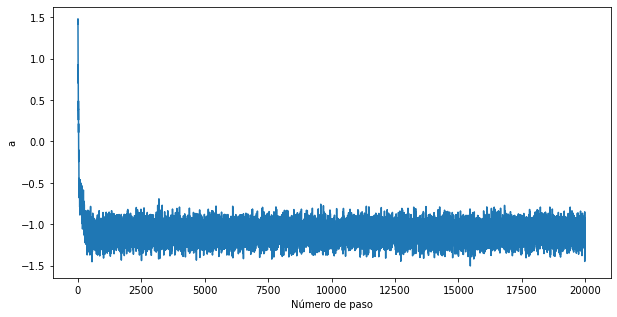

In [80]:
plt.figure(figsize=(10,5))
plt.plot(paso, a_lista[0], '-');
plt.xlabel('Número de paso')
plt.ylabel('a')

Text(0, 0.5, 'a')

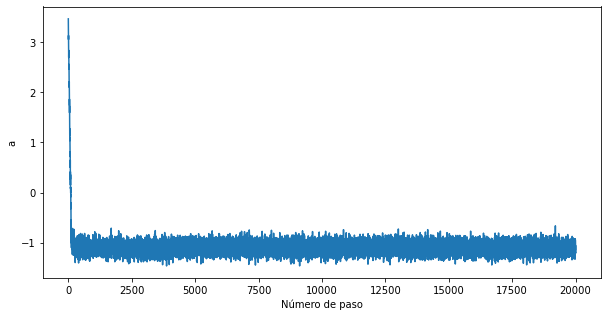

In [68]:
plt.figure(figsize=(10,5))
plt.plot(paso, a_lista[1], '-');
plt.xlabel('Número de paso')
plt.ylabel('a')

Text(0, 0.5, 'a')

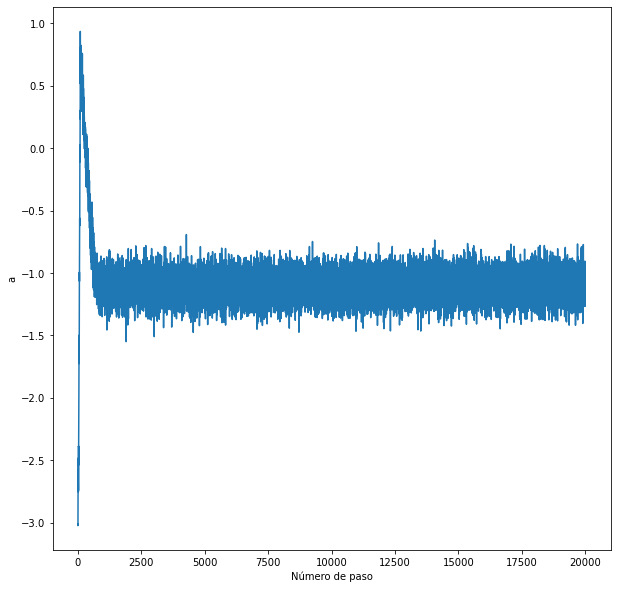

In [69]:
plt.figure(figsize=(10,10))
plt.plot(paso, a_lista[2], '-');
plt.xlabel('Número de paso')
plt.ylabel('a')

Text(0, 0.5, 'a')

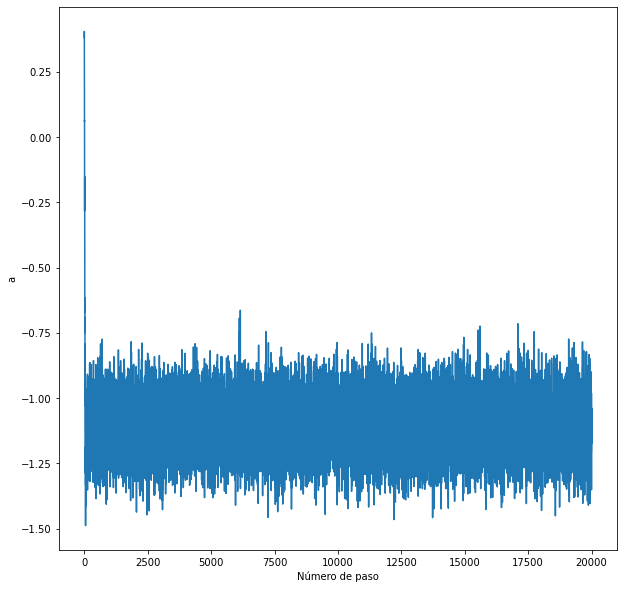

In [70]:
plt.figure(figsize=(10,10))
plt.plot(paso, a_lista[3], '-');
plt.xlabel('Número de paso')
plt.ylabel('a')

Text(0, 0.5, 'a')

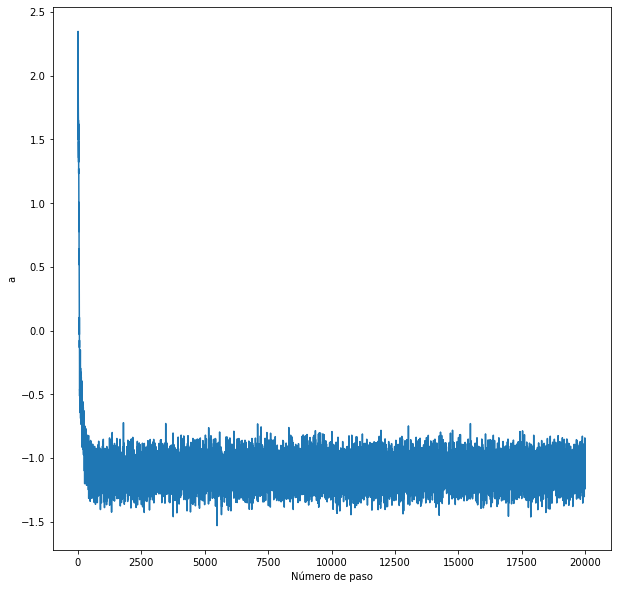

In [71]:
plt.figure(figsize=(10,10))
plt.plot(paso, a_lista[4], '-');
plt.xlabel('Número de paso')
plt.ylabel('a')

Text(0, 0.5, 'b')

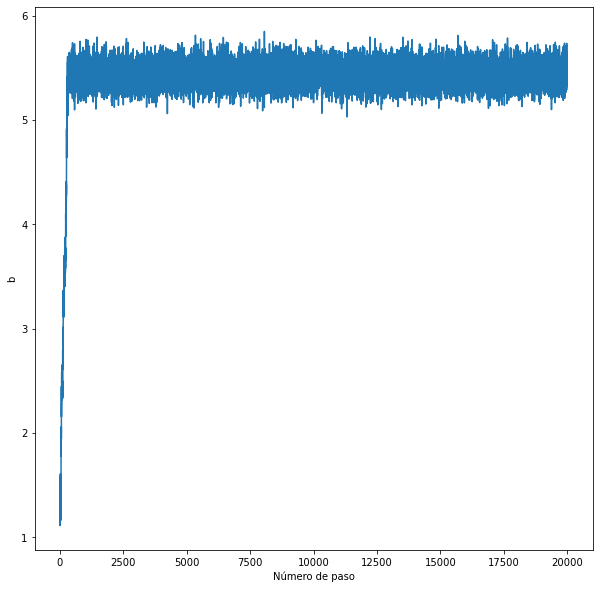

In [72]:
plt.figure(figsize=(10,10))
plt.plot(paso, b_lista[0], '-');
plt.xlabel('Número de paso')
plt.ylabel('b')

Text(0, 0.5, 'b')

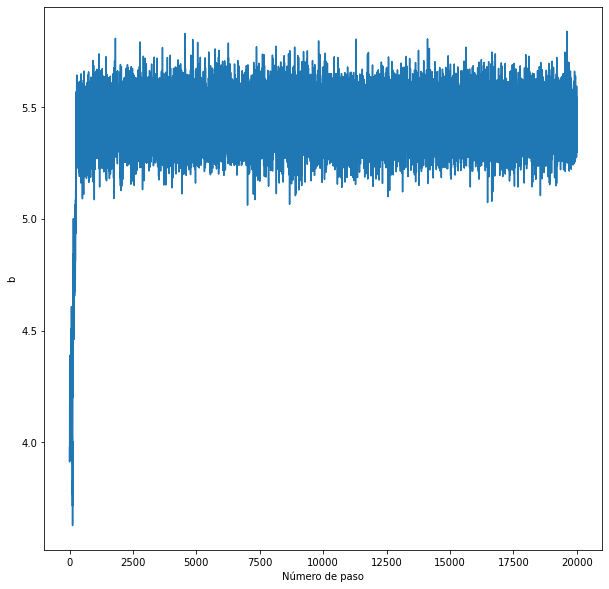

In [73]:
plt.figure(figsize=(10,10))
plt.plot(paso, b_lista[1], '-');
plt.xlabel('Número de paso')
plt.ylabel('b')

Text(0, 0.5, 'b')

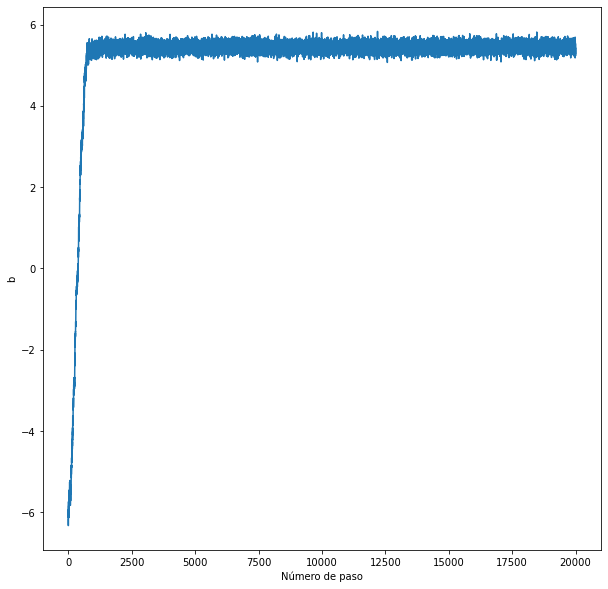

In [74]:
plt.figure(figsize=(10,10))
plt.plot(paso, b_lista[2], '-');
plt.xlabel('Número de paso')
plt.ylabel('b')

Text(0, 0.5, 'b')

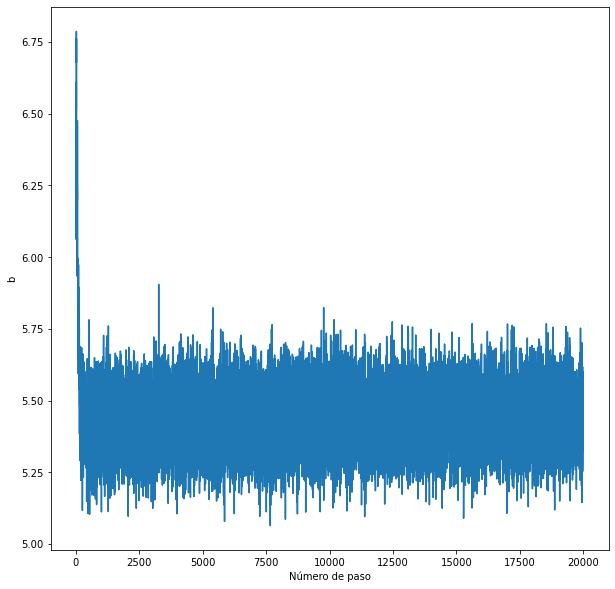

In [75]:
plt.figure(figsize=(10,10))
plt.plot(paso, b_lista[3], '-');
plt.xlabel('Número de paso')
plt.ylabel('b')

Text(0, 0.5, 'b')

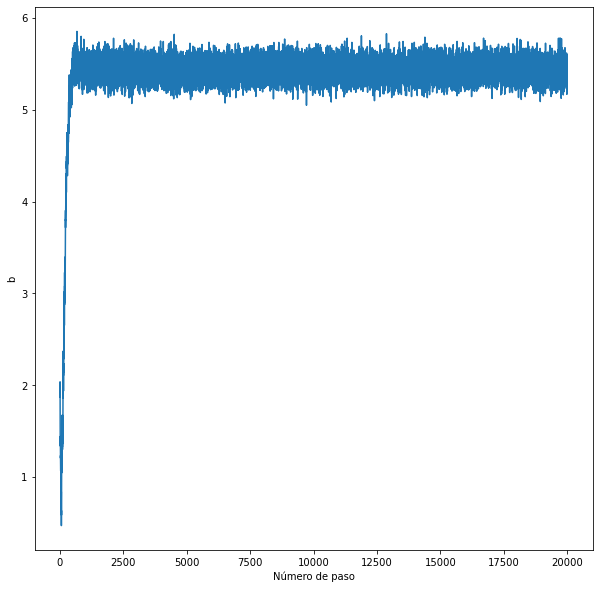

In [76]:
plt.figure(figsize=(10,10))
plt.plot(paso, b_lista[4], '-');
plt.xlabel('Número de paso')
plt.ylabel('b')